# Predictive Analytics for Real Estate Property Typing


In [44]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [45]:
#Importing all the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Unique id of every property
`area` | Area of the structure (sq. feet)
`bathrooms` | Number of bathrooms
`bedrooms` | Number of rooms
`condo_fee`| Condominium fee `(US $$)`
`parking_spots`| Number of parking spots
`attached_rooms` | Number of bedrooms with direct access to a bathroom.
`type` | Kind of real estate
`lat` | Latitude of the property
`lon` | Longitude of the property
`year_built` | Year the real property was built
`overall_condition` | Abstract evaluation of the owner
`has_elevator` | If the property has elevator or not
`leasures_available` | List of leasures in the property
`price`| Price of the real estate `(US $$)`

## Data Wrangling & Visualization

In [47]:
# Dataset is already loaded below
train_data = pd.read_csv("train.csv")
# train_data['house'] = pd.to_numeric(train_data['house'], errors='coerce')

test_data = pd.read_csv("test.csv")

In [48]:
train_data.head()

,id,area,bathrooms,bedrooms,condo_fee,parking_spots,attached_rooms,type,lat,lon,year_built,overall_condition,has_elevator,leasures_available,price
0,794,380,6.0,4.0,0.0,3.0,3.0,house,-5.855204,-35.220087,1974.0,Score 3,Yes,NaN,500000
1,199,60,2.0,2.0,0.0,1.0,1.0,apartment,-5.808983,-35.227251,NaN,Score 6,y,NaN,207480
2,1849,430,NaN,NaN,0.0,8.0,4.0,house,-5.843724,NaN,1980.0,Score 4,y,barbecue space,800000
3,33,55,2.0,2.0,280.0,0.0,1.0,apartment,-5.882136,-35.172217,1991.0,Score 5,yes,sports court,208900
4,179,50,2.0,2.0,420.0,1.0,2.0,apartment,-5.866124,-35.182770,2002.0,Score 4,y,"BARBECUE SPACE,playground",210000


In [49]:
#Explore columns
train_data.columns

Index(['id', 'area', 'bathrooms', 'bedrooms', 'condo_fee', 'parking_spots',
       'attached_rooms', 'type', 'lat', 'lon', 'year_built',
       'overall_condition', 'has_elevator', 'leasures_available', 'price'],
      dtype='object')

In [50]:
#Description
train_data.describe()

,id,area,bathrooms,bedrooms,condo_fee,parking_spots,attached_rooms,lat,lon,year_built,price
count,4056.000000,4056.000000,4036.000000,4030.000000,4044.000000,4046.000000,4044.000000,4045.000000,4041.000000,2533.000000,4.056000e+03
mean,2377.640039,107.705621,2.268831,2.635732,354.116222,1.618389,1.369683,-5.835676,-35.203506,1987.765101,3.962545e+05
std,1386.164798,95.332348,1.240710,0.835317,366.596604,1.032332,1.018299,0.034061,0.016523,15.413998,2.677453e+05
min,0.000000,20.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,-5.899991,-35.244931,1956.000000,6.000000e+04
25%,1177.750000,57.000000,1.000000,2.000000,0.000000,1.000000,1.000000,-5.866124,-35.213829,1973.000000,2.300000e+05
50%,2362.500000,91.000000,2.000000,3.000000,320.000000,2.000000,1.000000,-5.828402,-35.203220,1993.000000,3.300000e+05
75%,3592.250000,128.250000,3.000000,3.000000,561.000000,2.000000,2.000000,-5.808077,-35.196726,2002.000000,5.000000e+05
max,4771.000000,4200.000000,22.000000,22.000000,2500.000000,24.000000,22.000000,-5.726315,-35.170270,2010.000000,5.300000e+06


In [51]:
# The dependent feature, i.e 'price' is not in test_data, so we do not need to seperate the data.
#Checking for null values and filling them
print(train_data.isnull().sum())

id                       0
area                     0
bathrooms               20
bedrooms                26
condo_fee               12
parking_spots           10
attached_rooms          12
type                    10
lat                     11
lon                     15
year_built            1523
overall_condition        0
has_elevator             0
leasures_available    1429
price                    0
dtype: int64


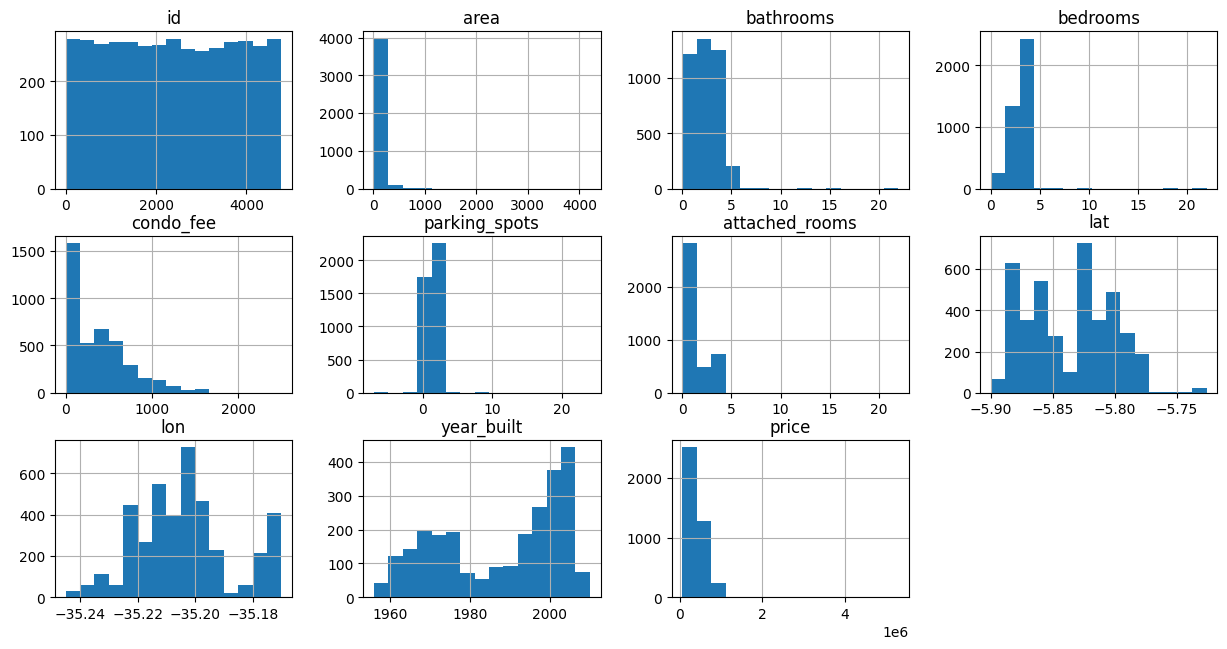

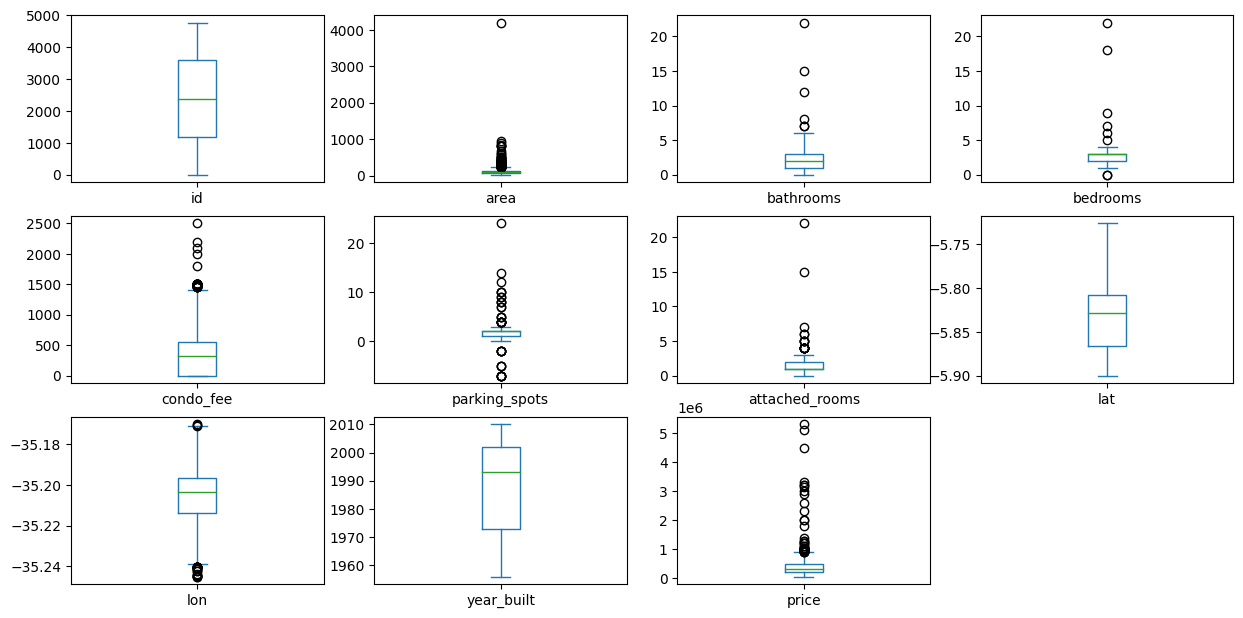

ValueError: could not convert string to float: 'house'

<Figure size 1000x800 with 0 Axes>

In [52]:
# Histograms of numerical features to understand distributions
train_data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()

# Box plots for numerical features to spot outliers
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[numerical_cols].plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10))
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f")
plt.show()

## Visualization, Modeling, Machine Learning

Can you build a model that can predict property prices and identify how different features influence their decision? Please explain your findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model would be evaluated on the basis of mean absolute percent error.**
- **Read the Test.csv file and prepare features for testing.**

In [ ]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

In [ ]:
test_data.columns

In [ ]:
#Stats of the test data
test_data.describe()

# Preprocessing

In [ ]:
#Importing libraries for preprocessing from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
# Separate features and target variable from the training data
X_train = train_data.drop(['price'], axis=1)  # Assuming 'price' is the target
y_train = train_data['price']

# Since the test dataset will not have the target variable, we align it with the training dataset
X_test = test_data.copy()

# Identify categorical and numerical columns
num_attribs = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_attribs = X_train.select_dtypes(include=['object']).columns.tolist()

# Remove 'id' if it's not a feature, but just an identifier
if 'id' in X_train.columns:
    num_attribs.remove('id')
    X_train = X_train.drop(['id'], axis=1)
    X_test = X_test.drop(['id'], axis=1)

# Define the pipeline for numerical attributes
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler()),  # Standardize numerical features
])

# Define the pipeline for categorical attributes
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore')),  # One-hot encode categorical features
])

# Combine numerical and categorical pipelines into a full preprocessing pipeline
full_pipeline = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

# Apply the full preprocessing pipeline to the training data
X_train_preprocessed = full_pipeline.fit_transform(X_train)

# Apply the full preprocessing pipeline to the test data
X_test_preprocessed = full_pipeline.transform(X_test)

# The data is now ready for training a model. Let's proceed to the next steps.
X_train_preprocessed.shape, X_test_preprocessed.shape

Now the data is ready for the model training

# Model Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the preprocessed training data
model.fit(X_train_preprocessed, y_train)

# Define Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create a scorer from the MAPE function
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Use the custom scorer in the cross_val_score function
cv_scores = cross_val_score(model, X_train_preprocessed, y_train, scoring=mape_scorer, cv=5)

# Calculate the MAPE scores
mape_scores = -cv_scores  # Multiply by -1 to get the positive MAPE scores
# Display the MAPE scores
print("MAPE scores:", mape_scores)
print("Mean MAPE:", mape_scores.mean())
print("Standard Deviation of MAPE:", mape_scores.std())

# Set up the figure
plt.figure(figsize=(8, 6))

# Create bar plot
plt.bar(range(1, 6), mape_scores, color = 'blue', alpha=0.7, label='Individual MAPE Scores')

# Add error bar for the standard deviation
plt.errorbar(range(1, 6), mape_scores, yerr=[mape_scores.std()]*5, fmt='o', color='r', label='Standard Deviation')

# Add title and labels with additional settings
plt.title('MAPE Scores Across 5-Fold Cross Validation')
plt.xlabel('Fold Number')
plt.ylabel('MAPE Score (%)')
plt.xticks(range(1, 6))  # Set x-ticks to be fold numbers

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Prepare the training data
# X_train = train_data.drop(['id', 'type', 'leasures_available'], axis=1)
# y_train = train_data['type']

# # Prepare the test data
# X_test = test_data.drop(['id', 'type', 'leasures_available'], axis=1)
# y_test = test_data['type']

# # Define the model
# model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the model
# model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Print the accuracy
# print("Accuracy:", accuracy_score(y_test, y_pred))

# # Print the classification report
# print(classification_report(y_test, y_pred))

# # Compute confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Plotting confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
# plt.title('Confusion Matrix')
# plt.ylabel('Actual Classes')
# plt.xlabel('Predicted Classes')
# plt.show()


**SARIMA Model**

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load data
data = pd.read_csv('train.csv')
data['year'] = pd.to_datetime(data['year_built'], format='%Y')  # Convert to datetime assuming 'year_built' is just the year
data.set_index('year', inplace=True)  # Set the datetime as the index

# Aggregate data
yearly_data = data.resample('A')['price'].mean()  # 'A' stands for year-end frequency

# Stationarity check (already done, but confirming steps)
result = adfuller(yearly_data.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Ensure stationarity (diff if needed based on p-value)
if result[1] > 0.05:
    yearly_data = yearly_data.diff().dropna()

# Define and fit the model
model = SARIMAX(yearly_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(yearly_data.index.max(), periods=13, freq='A')[1:]  # create a date range for the forecast steps
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data, label='Actual')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.legend()
plt.title('Real Estate Price Forecast')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()




**The management wants to know what are the most important features for your model.  Can you tell them?**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [ ]:
# Assuming model has already been fitted with the training data
feature_importances = model.feature_importances_

# Get feature names from the column transformer
# For numerical attributes, it's straight forward
feature_names = num_attribs.copy()

# For categorical attributes, we need to extract the list from the one hot encoder
# The 'categories_' attribute of the OneHotEncoder contains the unique categories in order they are encoded
cat_encoder = full_pipeline.named_transformers_['cat']['onehot']
cat_one_hot_attribs = list(cat_encoder.get_feature_names(cat_attribs))
feature_names.extend(cat_one_hot_attribs)

# Sort the feature importances in descending order and take the top 20
indices = np.argsort(feature_importances)[::-1][:20]
top_feature_names = np.array(feature_names)[indices]
top_feature_importances = feature_importances[indices]

# Visualize the top 20 features and their importances
plt.figure(figsize=(10, 6))
plt.barh(y=top_feature_names, width=top_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()

The above graph shows that the 'area' feature has the highest contribution in the model with 'parking_spot' and 'attached_rooms' contirbuting as well but not as much as 'area' feature.

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`Test.csv`), you must predict the value of the `price` variable. You should submit a CSV file with a header row and one row per test entry. The file (submissions.csv) should have exactly 2 columns:

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **price**

In [ ]:
# Make predictions using the fitted model
test_predictions = model.predict(X_test_preprocessed)


In [ ]:
# Create a submission dataframe with the required columns: id and price
submission_df = pd.DataFrame({
    'id': test_data['id'],   # Assuming the 'id' column was preserved from the test dataset
    'price': test_predictions
})

In [ ]:
submission_df.tail()

In [ ]:
# Save the submission file
submission_df.to_csv('submissions.csv', index=False)


---